In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [17]:
# Age de outlier var, incomeda da olabilir. kredi ortalaması 9589$
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.0,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.0,38500.00,55000.00,79200.00,6000000.00
loan_amnt,32581.0,9589.371106,6322.086646,500.0,5000.00,8000.00,12200.00,35000.00
loan_status,32581.0,0.218164,0.413006,0.0,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.0,3.00,4.00,8.00,30.00


In [18]:
#Kategorik Değişkenlerin Dağılımları
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:\n", df[col].value_counts())


person_home_ownership:
 person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

person_emp_length:
 person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
?         895
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

loan_intent:
 loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade:
 loan_grade
A    10777
B    10451
C     6458
D    

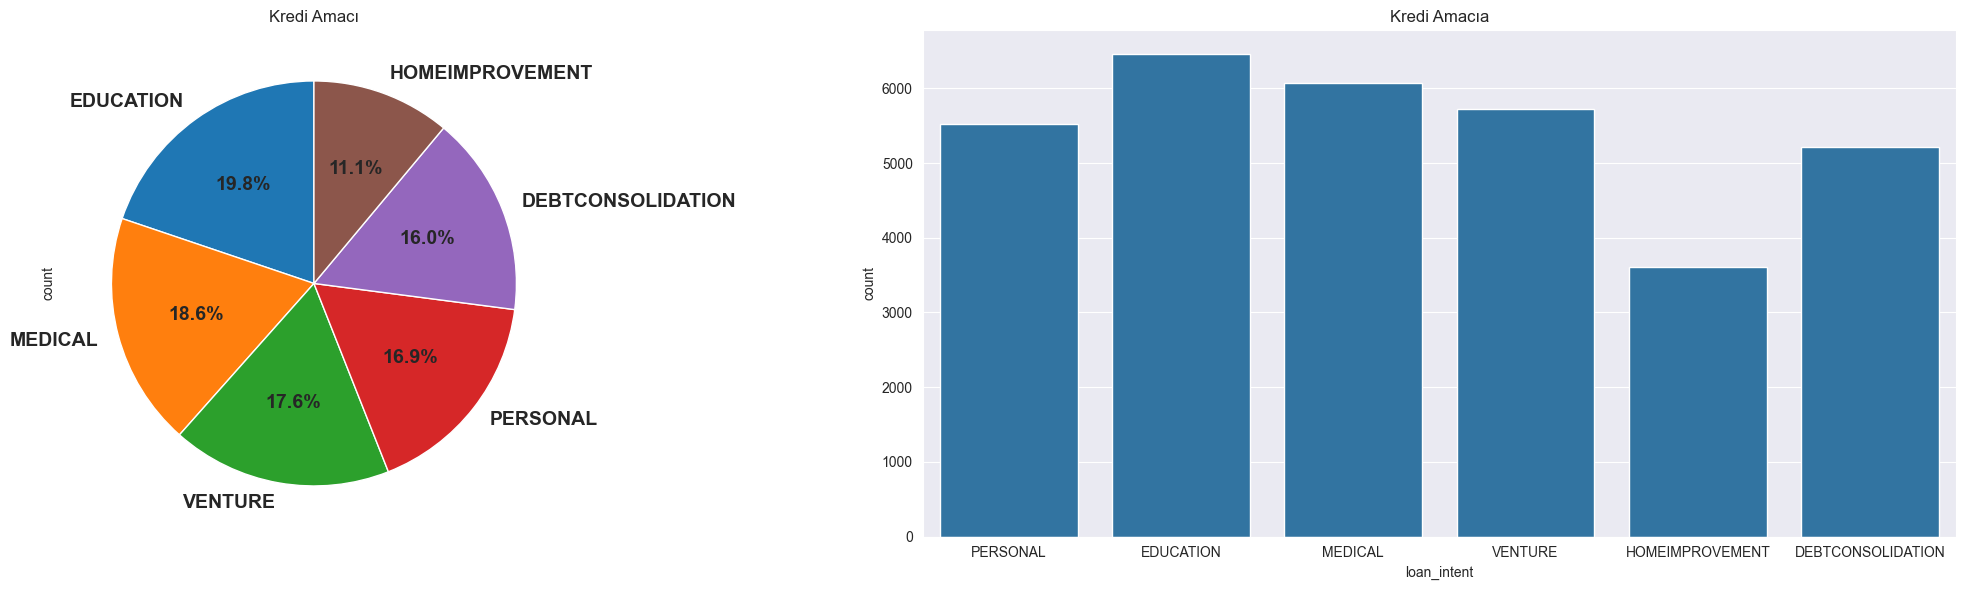

In [19]:
#Kredi Amacı Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
# Pie Chart
df['loan_intent'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kredi Amacı')

# Countplot
sns.countplot(x='loan_intent', data=df, ax=axes[1])
axes[1].set_title('Kredi Amacıa')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

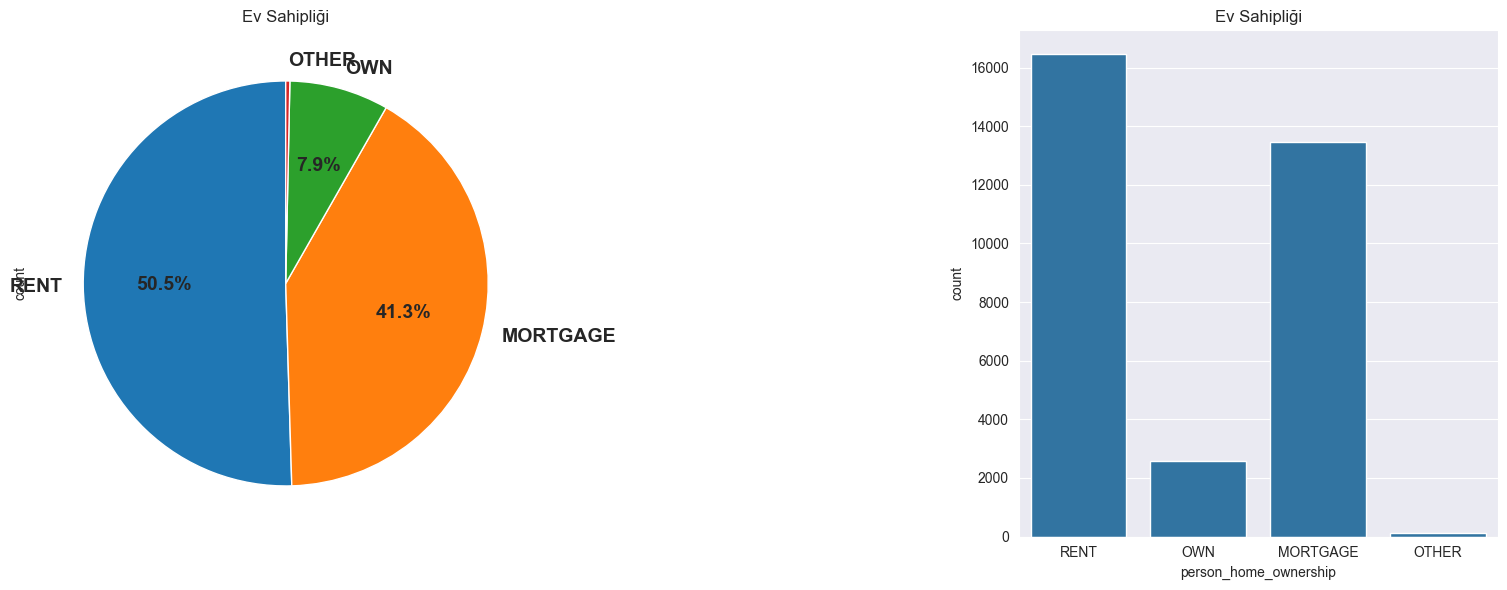

In [20]:
#Ev Sahipliği Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6),width_ratios=[4,1])
# Pie Chart
df['person_home_ownership'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Ev Sahipliği')

# Countplot
sns.countplot(x='person_home_ownership', data=df, ax=axes[1])
axes[1].set_title('Ev Sahipliği')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

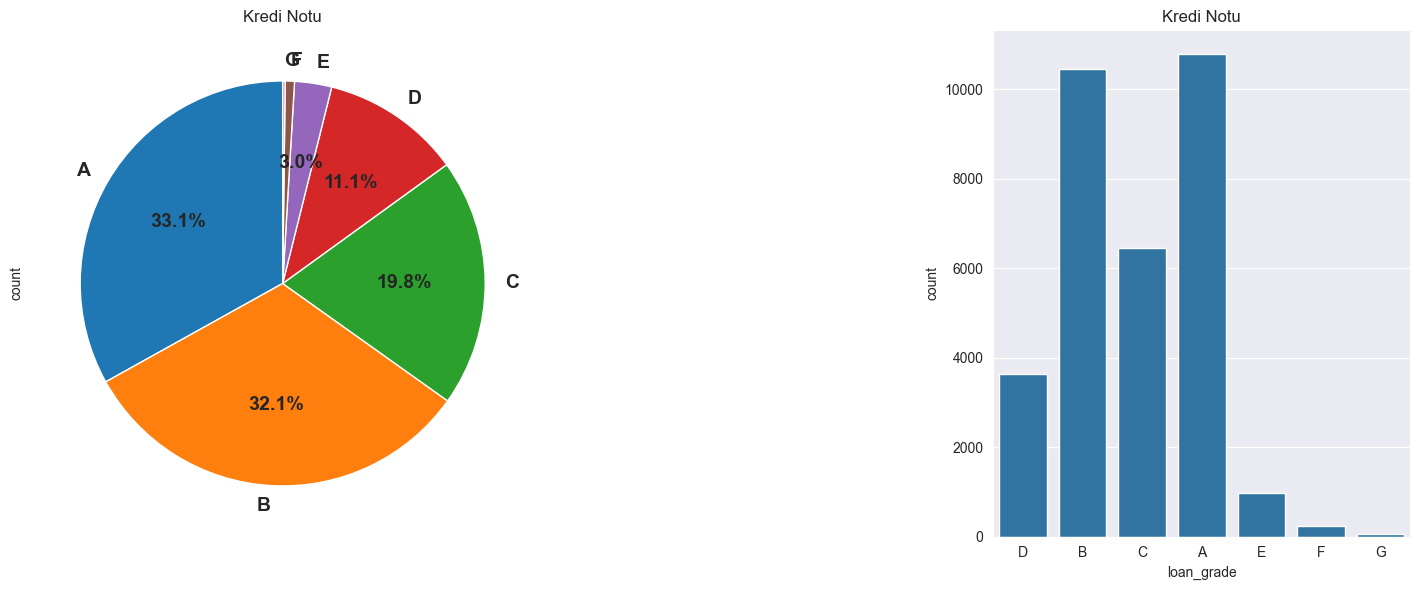

In [21]:
#Kredi Notu Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6), width_ratios=[5,1])
# Pie Chart
df['loan_grade'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kredi Notu')

# Countplot
sns.countplot(x='loan_grade', data=df, ax=axes[1])
axes[1].set_title('Kredi Notu')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

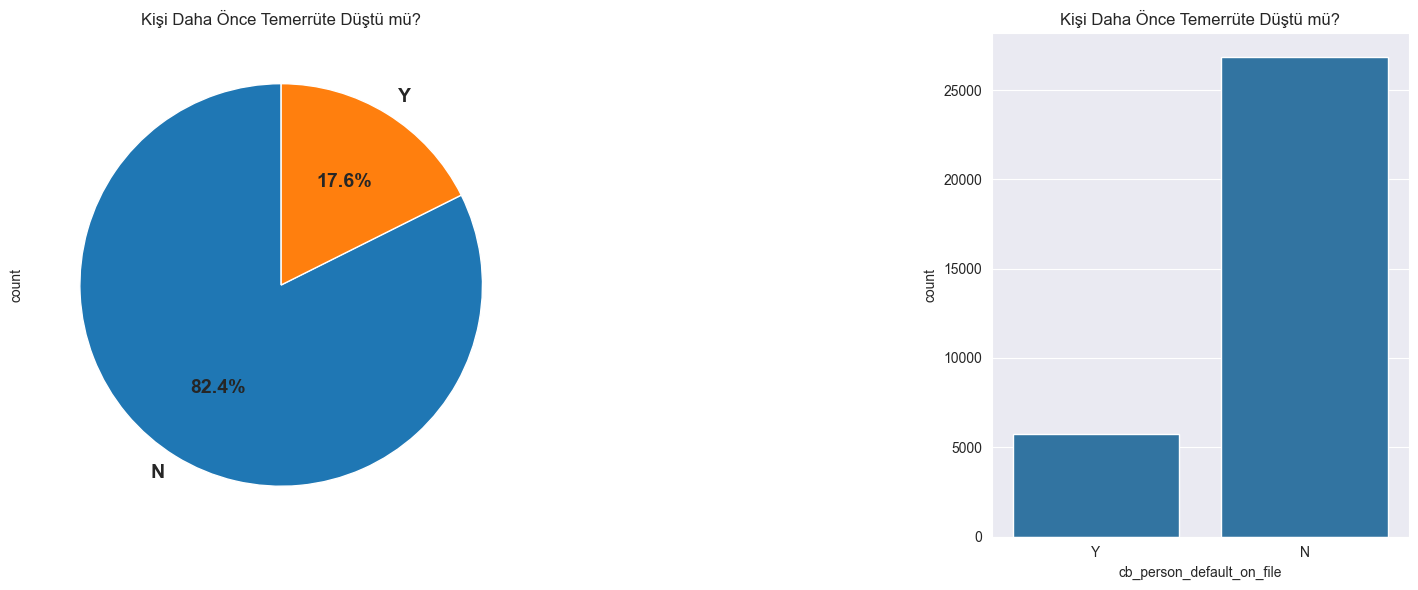

In [22]:
#Kredi Notu Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6), width_ratios=[5,1])
# Pie Chart
df['cb_person_default_on_file'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kişi Daha Önce Temerrüte Düştü mü?')

# Countplot
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1])
axes[1].set_title('Kişi Daha Önce Temerrüte Düştü mü?')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

In [186]:
# Çalışma hayatı uzunluğu verisinin temizlenmesi ve doğru veri tipine çevirilmesi
df.person_emp_length = df.person_emp_length.replace("?",np.nan)
df.person_emp_length = df.person_emp_length.astype(float)
df.person_emp_length = df.person_emp_length.fillna(df.person_emp_length.mean())
df.person_emp_length.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32581 entries, 0 to 32580
Series name: person_emp_length
Non-Null Count  Dtype  
--------------  -----  
32581 non-null  float64
dtypes: float64(1)
memory usage: 254.7 KB


In [187]:
# Kontrol
df.person_emp_length.isnull().sum()

0

In [188]:
# Faiz oranına tekrardan bakış
print(df['loan_int_rate'].value_counts())

loan_int_rate
?        3116
7.51      756
10.99     749
7.49      645
7.88      642
         ... 
21.64       1
20.48       1
17.46       1
21.14       1
20.53       1
Name: count, Length: 349, dtype: int64


In [194]:
# Bir sonraki adım için anlamı birbirine yakın olan iki değişkeni gerçekten anlamlı mı diye kontrol ediyorum
df.groupby("loan_grade")["loan_int_rate"].mean().sort_index()

loan_grade
A     7.342761
B    10.994994
C    13.465147
D    15.357022
E    16.993143
F    18.600851
G    20.244375
Name: loan_int_rate, dtype: float64

In [189]:
# Kredi Faiz Oranında "?" olan verileri anlamı bozmamaya çalışarak temizleyip yeniden doldurma
df["loan_int_rate"] = pd.to_numeric(df["loan_int_rate"].replace("?", np.nan))
df["loan_int_rate"] = df.groupby("loan_grade")["loan_int_rate"].transform(lambda x: x.fillna(x.median()))

In [190]:
print(df['loan_int_rate'].value_counts())

loan_int_rate
10.99    1805
7.49     1648
13.48     785
7.51      756
7.88      642
         ... 
21.64       1
20.48       1
17.46       1
21.14       1
20.53       1
Name: count, Length: 349, dtype: int64


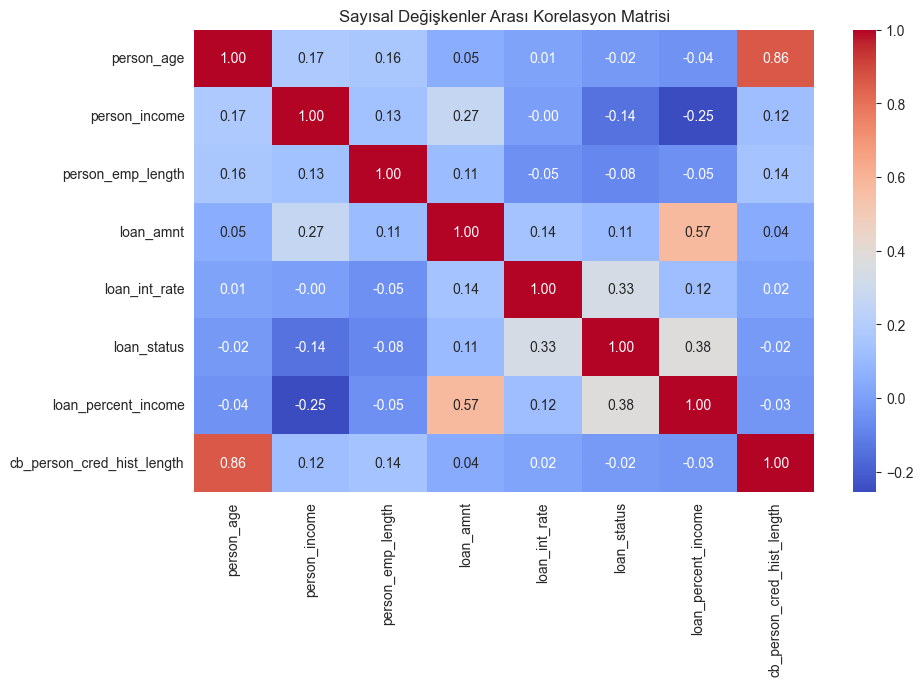

In [191]:
# Sayısal Değişkenlerin birbiri arasında korelasyonu, mesela kredi geçmişi yıl miktarı kişinin yaşıyla bir hayli korelasyon halinde doğal olarak.
# Kredi geri ödememe, yüksek faiz oranı ve gelire göre yüksek kredi yüzdesi ile ilişkili.
# loan_status = 1 (geri ödenmemiş) oranı ≈ %21.8
corr = df.select_dtypes(include=["int64", "float64"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.789686,4.085333,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.013902,3.212250,5.42,7.88,10.99,13.48,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00
